# Handwritten digit recognition: A neural network approach

Handwritten digit recognition is a good first-lesson on image recognition for beginners.
<br />  
The MNIST dataset consists 60000 training examples and 10000 test examples, of digits 0-9, can be downloaded from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/).
<br />  
In this project we will:

- Implement a 2-layer neural network.
- Compute the forward pass and backward pass with svm loss.
- Use the normlizaiton to help network converge.
- Use a stochastic gradient descent to optimize the loss function.
- Try a new type of neural network: Resnet, and apply the methodology to a three layer neural network.

In [1]:
from data_utils import loadMNIST

from __future__ import print_function
from two_layer_net import *
from three_layer_net import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load the data
Load the MNIST data to train a neural network. The data is located at `'dataset/'` directory, you should download the 4 ubyte files from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/) and unextract it in the right directory before loading. Dataset directory may vary when you change the location of you project folder, or use a different operating system. Make sure to modify `data_utils.py` when you change the dataset location.

In [2]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

print("Loaded training images of shape:", X_train.shape)
print("Loaded training labels of shape:", y_train.shape)
print("Loaded test images of shape", X_test.shape)
print("Loaded test labels of shape", y_test.shape)

Loaded training images of shape: (60000, 28, 28)
Loaded training labels of shape: (60000,)
Loaded test images of shape (10000, 28, 28)
Loaded test labels of shape (10000,)


# Show some random images
Show some random images to get a gut feeling of how the data looks like.
Make sure `row * col` is less than the size of training set example number.
To adjust the size of plot size, just modify: `plt.rcParams['figure.figsize']` on the first code block.

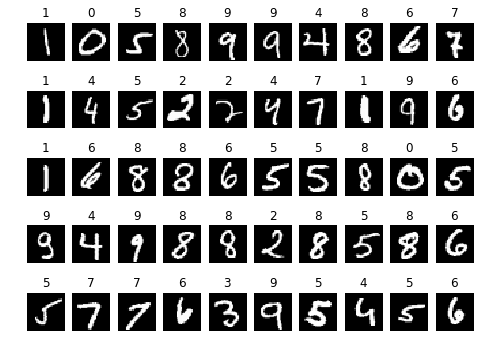

In [3]:
row, col = 5, 10
idx = np.random.choice(X_train.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title(y_train[plt_idx])
        plt.imshow(X_train[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Preprocess the data
## Preprocess Part.1
In this part, we preprocess the data by:

- Split training set data to train and validation.
- Normalize the data

In [4]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

# Split the data into train, val, and test sets. 
num_training = 50000
num_validation = 10000
num_test = 10000

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]


# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 28, 28)
Train labels shape:  (50000,)
Validation data shape:  (10000, 28, 28)
Validation labels shape:  (10000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


## Preprocess Part.2
Reshape the 3 dimension data to a `[N * (row * col)]` 2 dimension matrix.
`N` is the number of examples, `(row, col)` is the shape of an example image.

In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (50000, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


# Overfit Small Dataset
Training with a small dataset, i.e. a training set with 1000 example images, we should see an overfitting model.

In [6]:
# Preprocessing: reshape the image data into rows
X_train_small = X_train[:1000, :]
y_train_small = y_train[:1000]
# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train_small.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (1000, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


In [7]:
input_size = 28 * 28
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=1000, batch_size=50,
            learning_rate=1e-3, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 1000: loss 9.000163 val_acc 0.178800
iteration 100 / 1000: loss 0.112513 val_acc 0.872400
iteration 200 / 1000: loss 0.060676 val_acc 0.880800
iteration 300 / 1000: loss 0.073504 val_acc 0.880800
iteration 400 / 1000: loss 0.049537 val_acc 0.883600
iteration 500 / 1000: loss 0.040760 val_acc 0.885800
iteration 600 / 1000: loss 0.039260 val_acc 0.886200
iteration 700 / 1000: loss 0.038064 val_acc 0.886800
iteration 800 / 1000: loss 0.039735 val_acc 0.886500
iteration 900 / 1000: loss 0.036329 val_acc 0.884600
Validation accuracy:  0.8874
Train accuracy:  1.0


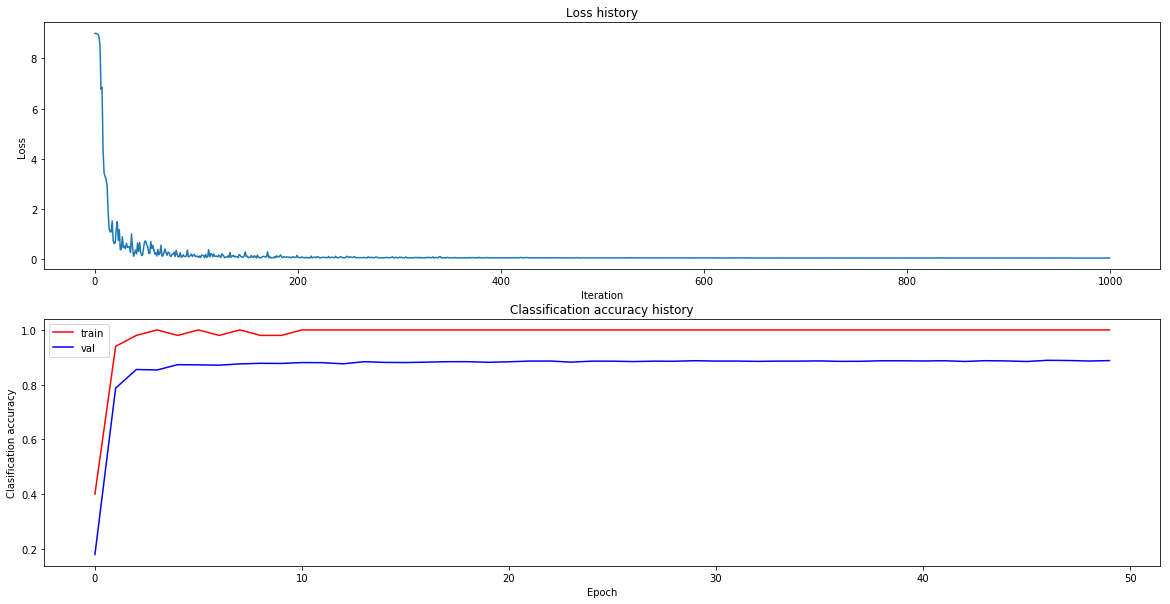

In [8]:
# Plot the loss function and train / validation accuracies
plt.rcParams['figure.figsize'] = (20.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'none'

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], 'r', label='train')
plt.plot(stats['val_acc_history'], 'b', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Training
Train a two layer neural network, update gradients with mini-batch data, optimize the loss with SGD.


In [9]:
input_size = 28 * 28
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.99,
            reg=0.2, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train) == y_train).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 10000: loss 9.000077 val_acc 0.484000
iteration 100 / 10000: loss 0.341954 val_acc 0.932000
iteration 200 / 10000: loss 0.249994 val_acc 0.943000
iteration 300 / 10000: loss 0.222118 val_acc 0.952600
iteration 400 / 10000: loss 0.198258 val_acc 0.958900
iteration 500 / 10000: loss 0.183646 val_acc 0.962100
iteration 600 / 10000: loss 0.218462 val_acc 0.965900
iteration 700 / 10000: loss 0.127938 val_acc 0.967300
iteration 800 / 10000: loss 0.165340 val_acc 0.969000
iteration 900 / 10000: loss 0.099367 val_acc 0.969300
iteration 1000 / 10000: loss 0.083572 val_acc 0.970100
iteration 1100 / 10000: loss 0.101419 val_acc 0.973100
iteration 1200 / 10000: loss 0.113964 val_acc 0.971600
iteration 1300 / 10000: loss 0.117867 val_acc 0.975300
iteration 1400 / 10000: loss 0.173251 val_acc 0.973500
iteration 1500 / 10000: loss 0.116824 val_acc 0.975100
iteration 1600 / 10000: loss 0.111470 val_acc 0.975400
iteration 1700 / 10000: loss 0.125082 val_acc 0.975600
iteration 1800 / 10000

# Debug the training
The loss history indicates whether loss is converging.
Overfitting or underfitting can be observed from classification accuracy history.
If there is a big gap between training accuracy and validation accuracy curves, the model is highly possible overfitting. Else if the training accuracy is low, and validation accuracy alike, the model might be underfitting.
To avoid such occasions, fine tune the parameters with your observation on the plots.

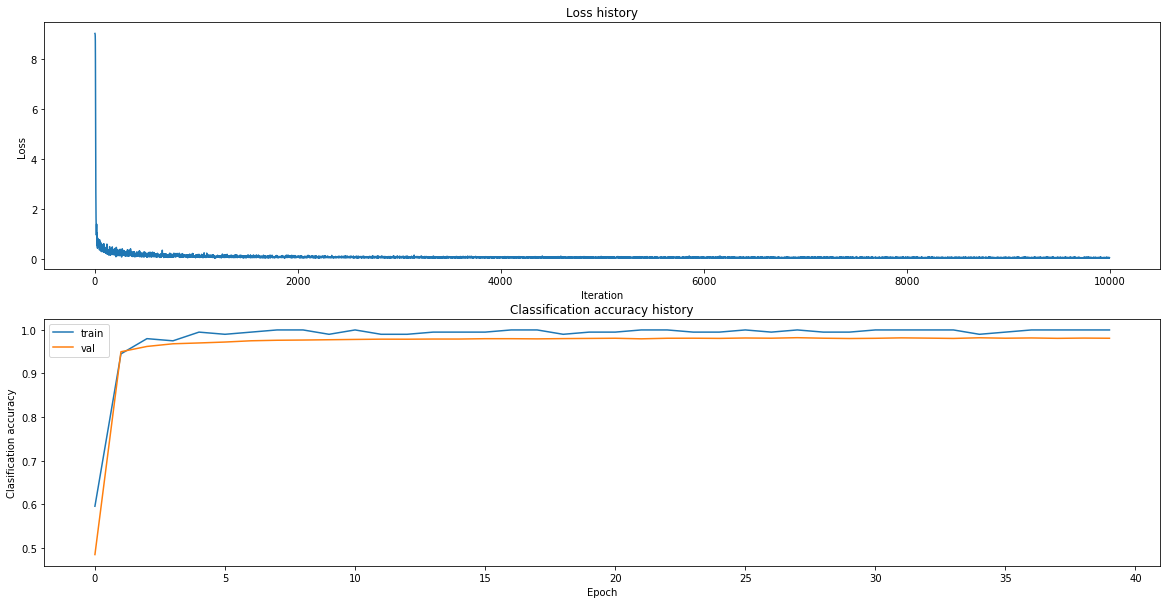

In [10]:
# Plot the loss function and train / validation accuracies
plt.rcParams['figure.figsize'] = (20.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'none'

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Performance of the model
Now it's time to finally evaluate our model, with test set data.

In [11]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9804


# Show some random image and predict using our model

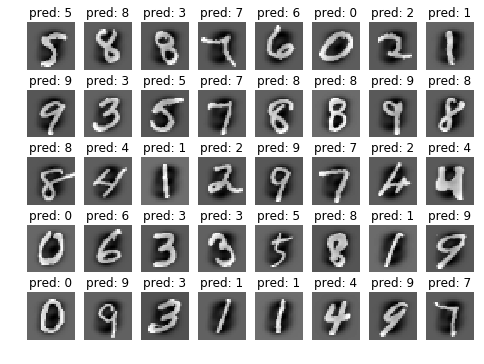

In [12]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

row, col = 5, 8
y_test_pred = net.predict(X_test)
X_test_image = X_test.reshape(-1, 28, 28)
idx = np.random.choice(X_test.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title('pred: ' + str(y_test_pred[plt_idx]))
        plt.imshow(X_test_image[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Use a Residual Block
The 2-layer plain neural network has acquired an accuracy of 98.2%. 
In this section we will use a three layer neural network, add a shortcut to bypass the first two layers, thus feed the input directly to the second relu layer.

## Overfit Small Data
With small dataset i.e. 1000 images, train two networks independently, the first doesn't use residual block, the second uses.

In [60]:
input_size = 28 * 28
hidden_size = 50
hidden2_size = 50
num_classes = 10
net_s = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std=0.005, use_Res=False)

# Train the network
stats_s = net_s.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=2500, batch_size=20,
            learning_rate=5e-4, learning_rate_decay=0.99,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net_s.predict(X_val) == y_val).mean()
train_acc = (net_s.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 2500: loss 9.040590 val_acc 0.156300 train_acc 0.174000
iteration 100 / 2500: loss 6.121730 val_acc 0.392200 train_acc 0.407000
iteration 200 / 2500: loss 2.171045 val_acc 0.733300 train_acc 0.770000
iteration 300 / 2500: loss 0.841465 val_acc 0.805200 train_acc 0.862000
iteration 400 / 2500: loss 0.400468 val_acc 0.840900 train_acc 0.900000
iteration 500 / 2500: loss 0.290472 val_acc 0.852400 train_acc 0.929000
iteration 600 / 2500: loss 0.316879 val_acc 0.864100 train_acc 0.942000
iteration 700 / 2500: loss 0.115297 val_acc 0.861900 train_acc 0.957000
iteration 800 / 2500: loss 0.168201 val_acc 0.866700 train_acc 0.969000
iteration 900 / 2500: loss 0.107744 val_acc 0.862600 train_acc 0.970000
iteration 1000 / 2500: loss 0.166250 val_acc 0.866800 train_acc 0.976000
iteration 1100 / 2500: loss 0.226361 val_acc 0.869300 train_acc 0.974000
iteration 1200 / 2500: loss 0.124926 val_acc 0.866700 train_acc 0.981000
iteration 1300 / 2500: loss 0.206275 val_acc 0.867400 train_acc

In [61]:
input_size = 28 * 28
hidden_size = 50
hidden2_size = 50
num_classes = 10
net_s_r = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std=0.005, use_Res=True)

# Train the network
stats_s_r = net_s_r.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=2500, batch_size=20,
            learning_rate=5e-4, learning_rate_decay=0.99,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net_s_r.predict(X_val) == y_val).mean()
train_acc = (net_s_r.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 2500: loss 8.872841 val_acc 0.227400 train_acc 0.256000
iteration 100 / 2500: loss 0.621782 val_acc 0.870900 train_acc 0.950000
iteration 200 / 2500: loss 0.123824 val_acc 0.887000 train_acc 0.982000
iteration 300 / 2500: loss 0.133757 val_acc 0.883800 train_acc 0.990000
iteration 400 / 2500: loss 0.114618 val_acc 0.889700 train_acc 0.994000
iteration 500 / 2500: loss 0.108414 val_acc 0.889500 train_acc 0.999000
iteration 600 / 2500: loss 0.108149 val_acc 0.885800 train_acc 0.999000
iteration 700 / 2500: loss 0.107766 val_acc 0.885800 train_acc 0.999000
iteration 800 / 2500: loss 0.107318 val_acc 0.886000 train_acc 1.000000
iteration 900 / 2500: loss 0.106926 val_acc 0.886900 train_acc 1.000000
iteration 1000 / 2500: loss 0.106512 val_acc 0.885800 train_acc 1.000000
iteration 1100 / 2500: loss 0.106096 val_acc 0.886600 train_acc 1.000000
iteration 1200 / 2500: loss 0.105701 val_acc 0.885800 train_acc 1.000000
iteration 1300 / 2500: loss 0.105313 val_acc 0.886700 train_acc

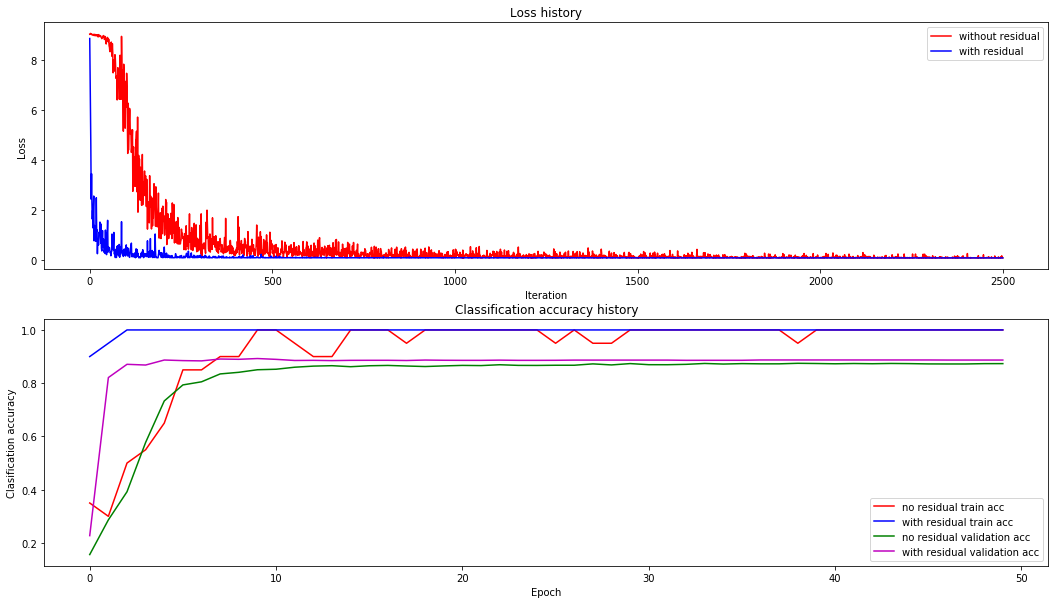

In [63]:
# Plot the loss function and train / validation accuracies
plt.rcParams['figure.figsize'] = (18.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'none'

plt.subplot(2, 1, 1)
plt.plot(stats_s['loss_history'], 'r', label="without residual")
plt.plot(stats_s_r['loss_history'], 'b', label="with residual")
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(stats_s['train_acc_history'], 'r', label="no residual train acc")
plt.plot(stats_s_r['train_acc_history'], 'b', label="with residual train acc")
plt.plot(stats_s['val_acc_history'], 'g', label="no residual validation acc")
plt.plot(stats_s_r['val_acc_history'], 'm', label="with residual validation acc")
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

## Training: Performance of Residual Block
Train two networks independently, the first one does not use residual block, the second uses.

In [17]:
input_size = 28 * 28
hidden_size = 500
hidden2_size = 200
num_classes = 10
net_b = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.005, use_Res=False)

# Train the network
stats_b = net_b.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=100,
            learning_rate=1e-3, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net_b.predict(X_val) == y_val).mean()
train_acc = (net_b.predict(X_train) == y_train).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 10000: loss 11.983604 val_acc 0.192900 train_acc 0.182100
iteration 100 / 10000: loss 3.618427 val_acc 0.900400 train_acc 0.890360
iteration 200 / 10000: loss 3.249347 val_acc 0.920800 train_acc 0.914100
iteration 300 / 10000: loss 2.821982 val_acc 0.935500 train_acc 0.928440
iteration 400 / 10000: loss 2.453917 val_acc 0.945300 train_acc 0.936440
iteration 500 / 10000: loss 2.409638 val_acc 0.947400 train_acc 0.942320
iteration 600 / 10000: loss 2.246352 val_acc 0.949700 train_acc 0.944520
iteration 700 / 10000: loss 2.097203 val_acc 0.954400 train_acc 0.948920
iteration 800 / 10000: loss 1.899041 val_acc 0.954700 train_acc 0.951780
iteration 900 / 10000: loss 1.702401 val_acc 0.957400 train_acc 0.953960
iteration 1000 / 10000: loss 1.638054 val_acc 0.959100 train_acc 0.956800
iteration 1100 / 10000: loss 1.492375 val_acc 0.960100 train_acc 0.958360
iteration 1200 / 10000: loss 1.395461 val_acc 0.961100 train_acc 0.960080
iteration 1300 / 10000: loss 1.382126 val_acc 0.9

The second one uses residual block.

In [18]:
input_size = 28 * 28
hidden_size = 500
hidden2_size = 200
num_classes = 10
net_b_r = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std=0.005, use_Res=True)

# Train the network
stats_b_r = net_b_r.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=100,
            learning_rate=1e-3, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net_b_r.predict(X_val) == y_val).mean()
train_acc = (net_b_r.predict(X_train) == y_train).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 10000: loss 13.240004 val_acc 0.500700 train_acc 0.483440
iteration 100 / 10000: loss 4.113137 val_acc 0.919200 train_acc 0.912780
iteration 200 / 10000: loss 3.688032 val_acc 0.943400 train_acc 0.941520
iteration 300 / 10000: loss 3.504444 val_acc 0.952400 train_acc 0.949540
iteration 400 / 10000: loss 3.268754 val_acc 0.958800 train_acc 0.960120
iteration 500 / 10000: loss 3.172097 val_acc 0.958300 train_acc 0.962840
iteration 600 / 10000: loss 2.855724 val_acc 0.963300 train_acc 0.965300
iteration 700 / 10000: loss 2.739316 val_acc 0.964400 train_acc 0.968880
iteration 800 / 10000: loss 2.576663 val_acc 0.966000 train_acc 0.971000
iteration 900 / 10000: loss 2.481110 val_acc 0.965300 train_acc 0.973120
iteration 1000 / 10000: loss 2.321768 val_acc 0.966900 train_acc 0.976900
iteration 1100 / 10000: loss 2.185762 val_acc 0.969200 train_acc 0.978840
iteration 1200 / 10000: loss 2.169554 val_acc 0.966900 train_acc 0.974940
iteration 1300 / 10000: loss 2.007929 val_acc 0.9

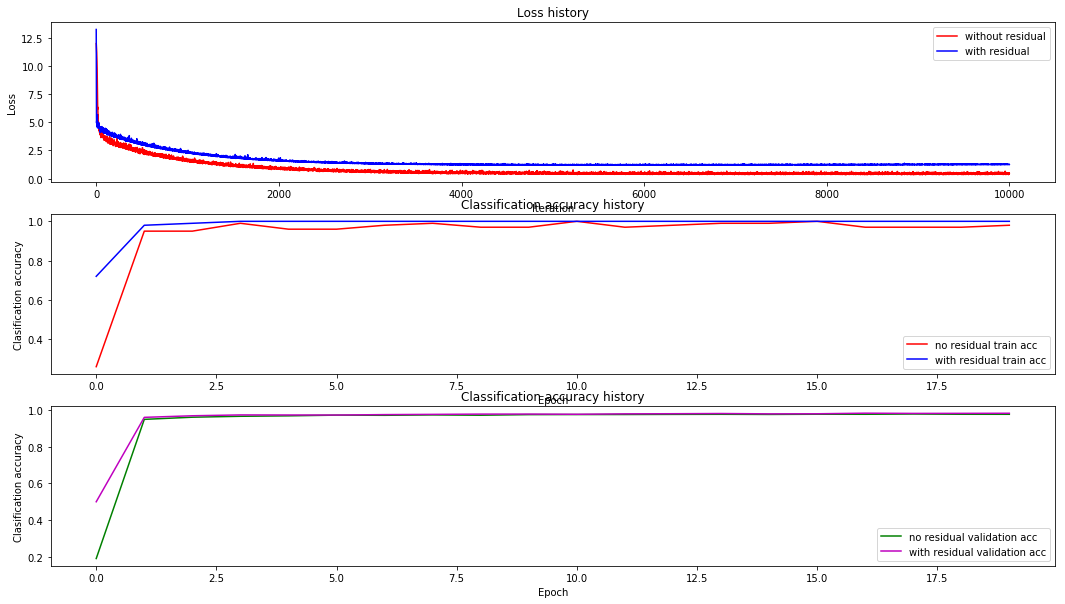

In [19]:
# Plot the loss function and train / validation accuracies
plt.rcParams['figure.figsize'] = (18.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'none'

plt.subplot(3, 1, 1)
plt.plot(stats_b['loss_history'], 'r', label="without residual")
plt.plot(stats_b_r['loss_history'], 'b', label="with residual")
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(stats_b['train_acc_history'], 'r', label="no residual train acc")
plt.plot(stats_b_r['train_acc_history'], 'b', label="with residual train acc")
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(stats_b['val_acc_history'], 'g', label="no residual validation acc")
plt.plot(stats_b_r['val_acc_history'], 'm', label="with residual validation acc")
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

The model with residual block performs slightly better than the one doesn't.

In [20]:
test_acc = (net_b.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)
test_acc_r = (net_b_r.predict(X_test) == y_test).mean()
print('Test accuracy with residual: ', test_acc_r)

Test accuracy:  0.9724
Test accuracy with residual:  0.9786


# Acknowledgment
Some of the code and structure is copied from Stanford course [CS231n](https://cs231n.github.io) assignments. Lectured by Fei-Fei Li, Andrej Karpathy, Justion Johnson and Serena Yeung

# Source code

On Github: https://github.com/msfanggao/mnist